<a href="https://colab.research.google.com/github/shrestha94sujan/stocks_analysis/blob/master/stocks_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
print('hello world of stocks!')

hello world of stocks!


**Installing yfinance api for importing the financial stuffs.**

In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=7fcdb45d09476af2cc1e230894ea8883e172ea4e687965c4136aff082758c2f5
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


**Adding import statements.**

In [11]:
import yfinance as yf

# Just get the AAPL stocks, cuz frankly that's all i am interested in, lol
aapl = yf.Ticker('AAPL')

#get historical market data
hist = aapl.history(period='15y')

#if you wish to look at the entire historical data for last 15 years!
print(hist)

              Open    High     Low   Close     Volume  Dividends  Stock Splits
Date                                                                          
2005-05-09    4.61    4.63    4.54    4.57   88923800       0.00           0.0
2005-05-10    4.54    4.61    4.49    4.50  110065900       0.00           0.0
2005-05-11    4.35    4.41    4.09    4.40  510495300       0.00           0.0
2005-05-12    4.38    4.40    4.20    4.22  242560500       0.00           0.0
2005-05-13    4.23    4.36    4.21    4.30  175678300       0.00           0.0
...            ...     ...     ...     ...        ...        ...           ...
2020-05-04  288.39  292.90  285.55  292.37   33392000       0.00           0.0
2020-05-05  294.26  300.19  293.67  296.76   36937800       0.00           0.0
2020-05-06  299.65  302.42  298.06  299.82   35583400       0.00           0.0
2020-05-07  302.40  304.35  301.15  302.92   28803800       0.00           0.0
2020-05-08  305.64  310.35  304.29  310.13   3345960

**Historical charts that shows opening and closing stock prices.**

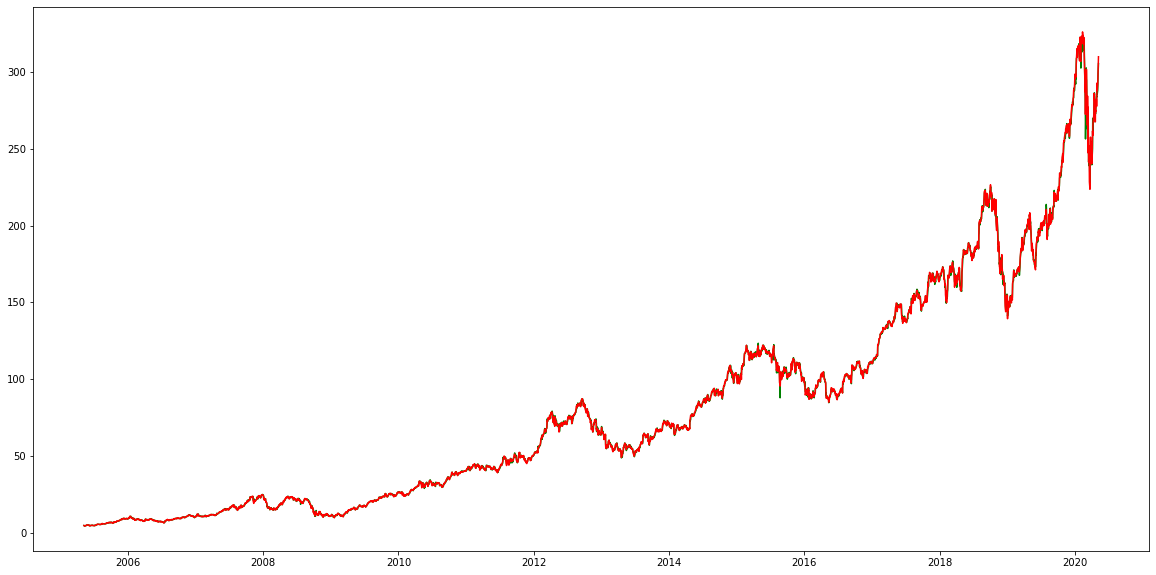

In [24]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

#Plot Open and Close prices.
plt.figure(figsize=(20, 10))
plt.plot(hist['Open'], color='green')
plt.plot(hist['Close'], color='red')



As we can see, the chart really doesn't help us draw a good understanding of the stock except show an increasing trend! That's where the Data modeling and clustering comes in. 

**Modeling our stock price data to meet requirements.**

[ 0.04  0.04 -0.05 ... -0.17 -0.52 -4.49]


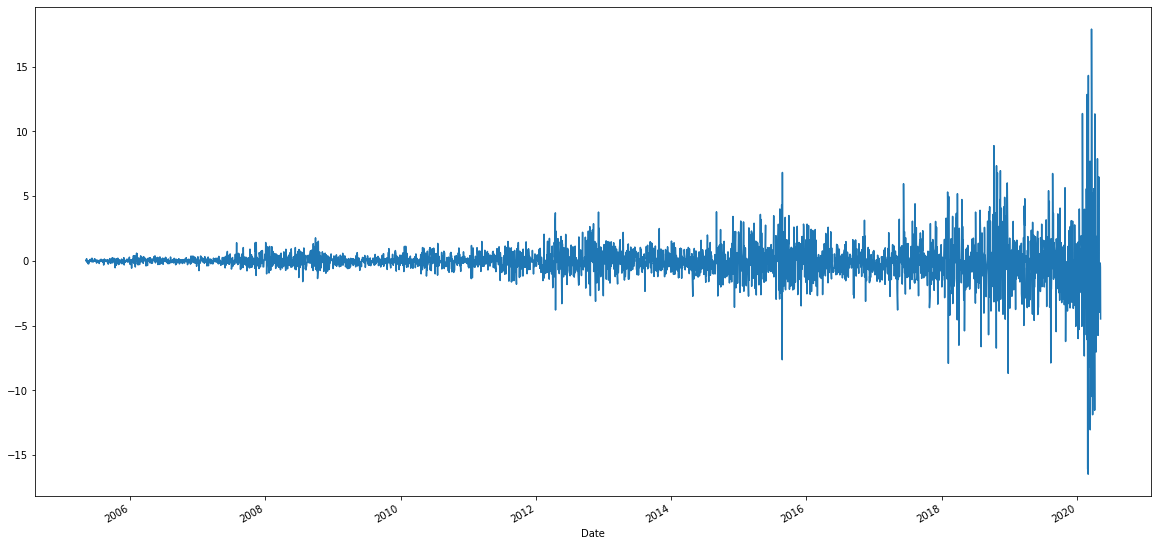

In [25]:
import pandas as pd
import numpy as np


#price change per day
pcd = np.asarray(hist['Open'] - hist['Close'])

print(pcd)  #printing out price change per day just becuz.

hist['PCD'] = pcd #adding PCD column with corresponding data to the "hist" dataframe
hist['PCD'].plot(figsize=(20, 10))  #plotting the PCD data wrt time series

**Observation:**  An important observation is that the volatility of the stock prices is increasing wrt time. As we further in time, we may notice even more volatility(fluctuation) in the stock prices!<br>Now, one might share an opinion that volatile stock prices is not a sign of a good stock, but another might share a different opinion!, that although high risk associated to volatility, the return might be very high depending on when the stock is purchased and sold. 

**Note:** Another important observation is, we can see occasional spikes here and there in "PCD". Now, this could have happened due to a number of different reasons, but we are only concerned whether it's also driven by certain date, year or month!

# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**KMEANS**

---



In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

**Finding optimal number of clusters**



1.   **Elbow Curve** method



In [0]:
X = hist[['PCD']]

kmeans_per_k = [KMeans(n_clusters=k, random_state=43).fit(X) 
                for k in range(1,15)]
inertias = [model.inertia_ for model in kmeans_per_k]

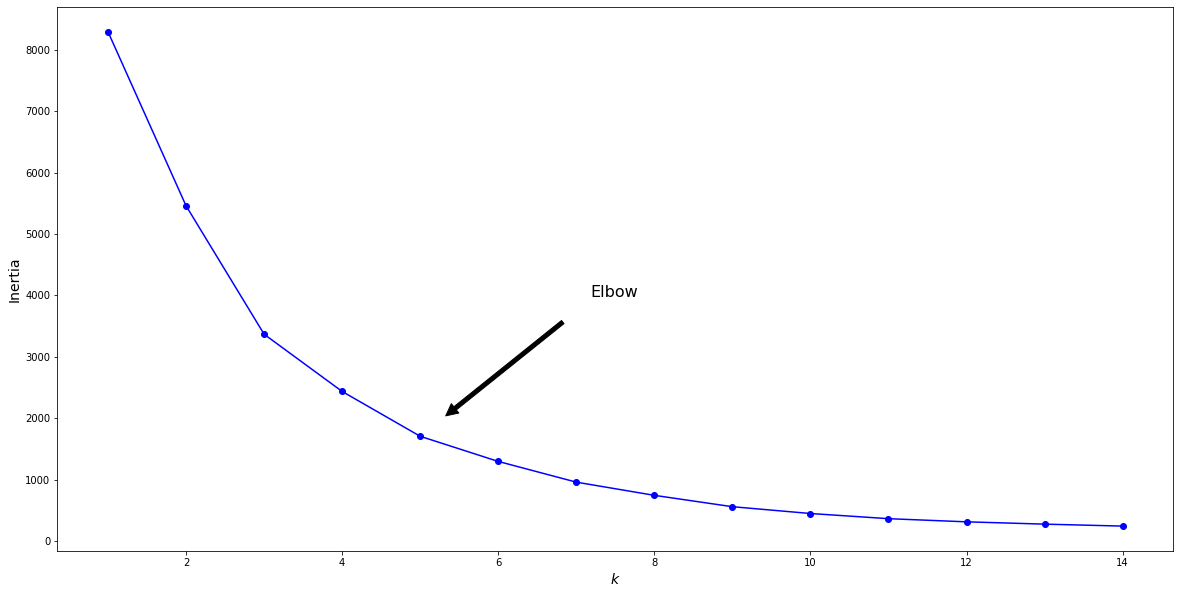

In [85]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 15), inertias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.15)
            )
plt.show()

**Observation**: From the figure we notice the elbow curve at k=5, which means number of optimal cluster is 5 as per elbow curve technique.